<a id="1"></a>
# **<center><span style="color:#F2F7F2;">Setup and Initialization</span></center>**

In [2]:
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# **<center><span style="color:#F2F7F2;">Read Dataset</span></center>**

Upload the zip file for the dataset in your Drive in order to execute the code, else keep in the same directory as the ipynb file and change the paths accordingly.

In [3]:
from google.colab import drive
drive.mount('/content/drive') #only needed if dataset in in drive

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classification/pa

In [5]:
#Create Files_Name
image_data= '/content/garbage_classification' #change according to your dataset path
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

Files_Name
0         trash
1         paper
2       clothes
3         metal
4         shoes
5       plastic
6     cardboard
7    biological
8   white-glass
9       battery
10  brown-glass
11  green-glass

In [6]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

Image        Label
0      /content/garbage_classification/shoes/shoes131...        shoes
1      /content/garbage_classification/clothes/clothe...      clothes
2      /content/garbage_classification/cardboard/card...    cardboard
3      /content/garbage_classification/paper/paper312...        paper
4      /content/garbage_classification/clothes/clothe...      clothes
...                                                  ...          ...
15510  /content/garbage_classification/brown-glass/br...  brown-glass
15511  /content/garbage_classification/clothes/clothe...      clothes
15512  /content/garbage_classification/shoes/shoes673...        shoes
15513  /content/garbage_classification/paper/paper380...        paper
15514  /content/garbage_classification/clothes/clothe...      clothes

[15515 rows x 2 columns]

<a id="3"></a>
# **<center><span style="color:#F2F7F2;">Exploratory Data Analysis</span></center>**

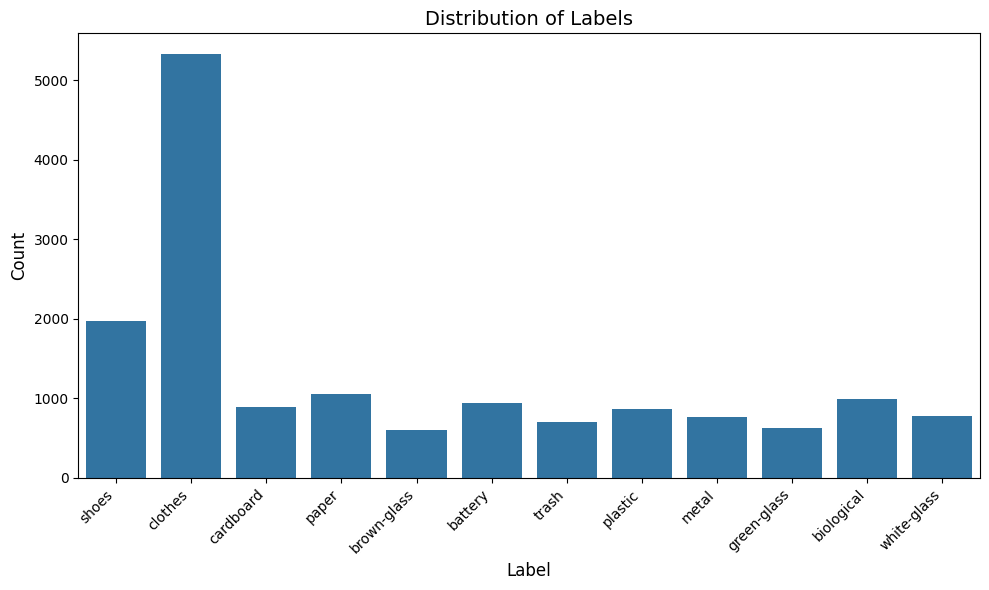

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe["Label"])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Labels", fontsize=14)
plt.tight_layout()
plt.show()


In [8]:

# Display some statistics about the dataset
num_classes = len(dataframe["Label"].unique())
total_samples = len(dataframe)
class_counts = dataframe["Label"].value_counts()

print("Number of classes:", num_classes)
print("Total number of samples:", total_samples)
print("Class-wise distribution:")
print(class_counts)


Number of classes: 12
Total number of samples: 15515
Class-wise distribution:
Label
clothes        5325
shoes          1977
paper          1050
biological      985
battery         945
cardboard       891
plastic         865
white-glass     775
metal           769
trash           697
green-glass     629
brown-glass     607
Name: count, dtype: int64


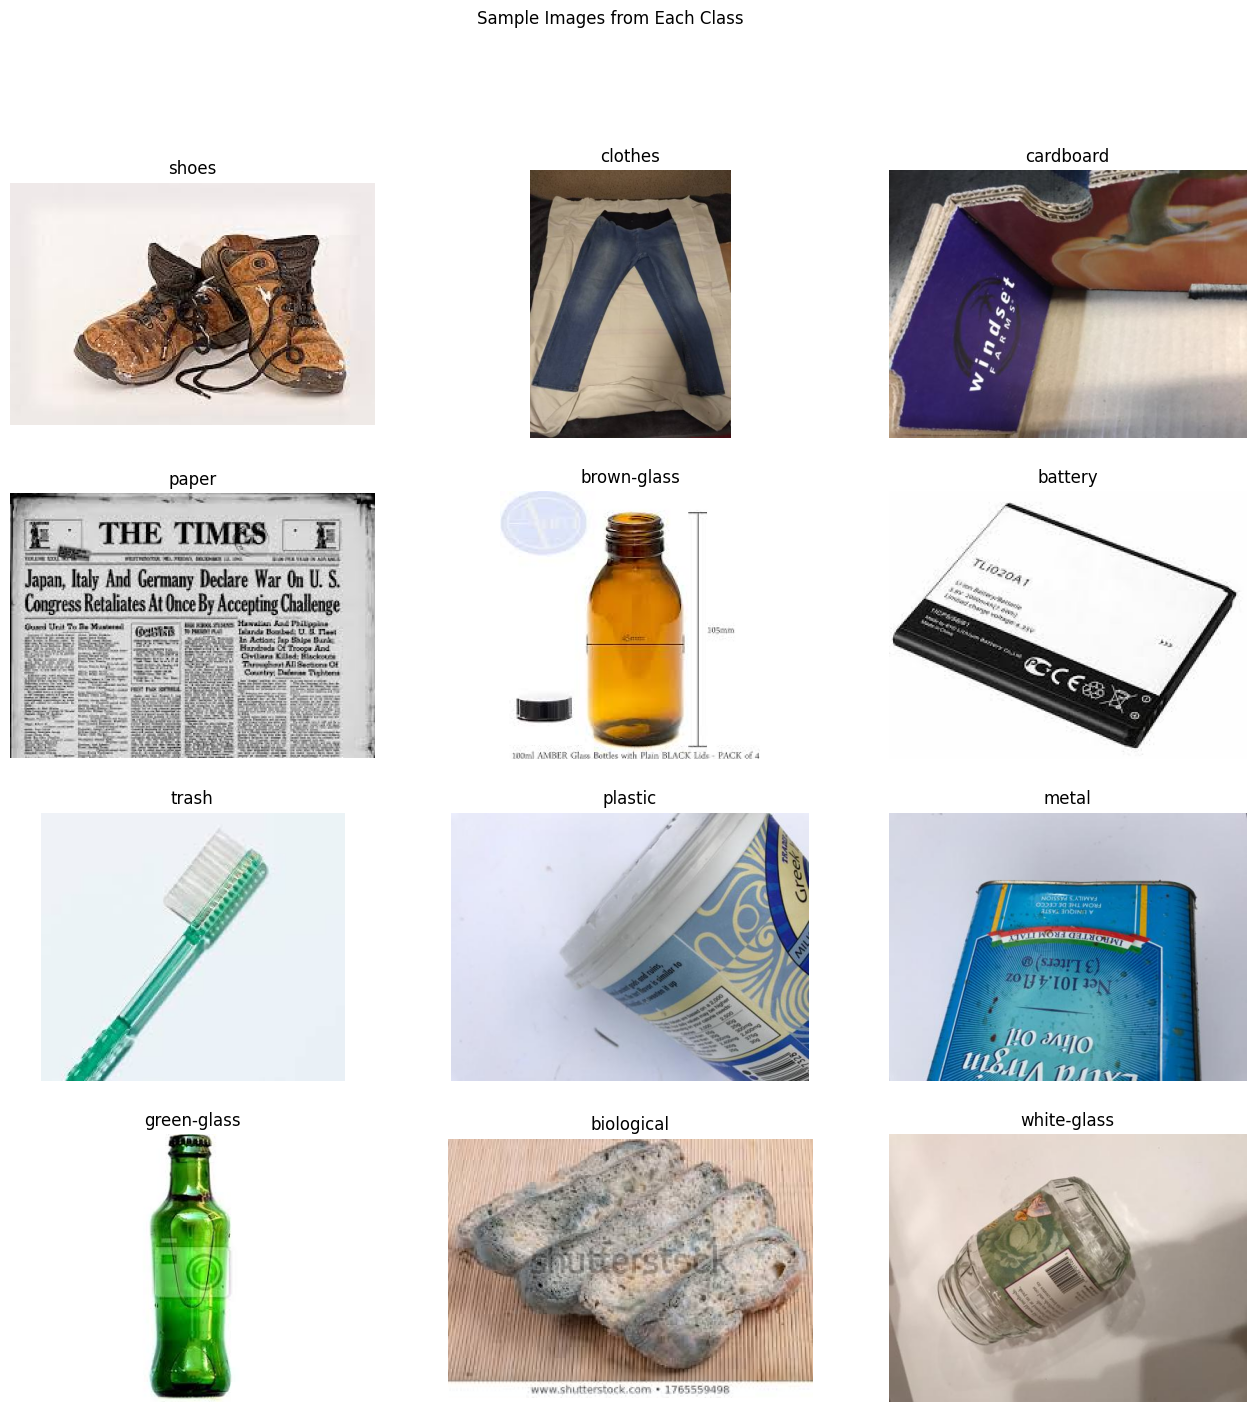

In [9]:
# Calculate the number of rows and columns for the subplot grid
num_labels = len(dataframe["Label"].unique())
num_cols = 3
num_rows = math.ceil(num_labels / num_cols)

# Display sample images from each class
plt.figure(figsize=(16, 16))
for i, label in enumerate(dataframe["Label"].unique()):
    plt.subplot(num_rows, num_cols, i+1)
    sample_img_path = dataframe[dataframe["Label"] == label]["Image"].iloc[0]
    sample_img = plt.imread(sample_img_path)
    plt.imshow(sample_img)
    plt.title(label)
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()



<a id="4"></a>
# **<center><span style="color:#F2F7F2;">Stratified Data Splitting: Train & Validation</span></center>**

In [10]:
train_data_dir =image_data
batch_size = 128
target_size = (224,224)
validation_split = 0.2

In [11]:

train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [12]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

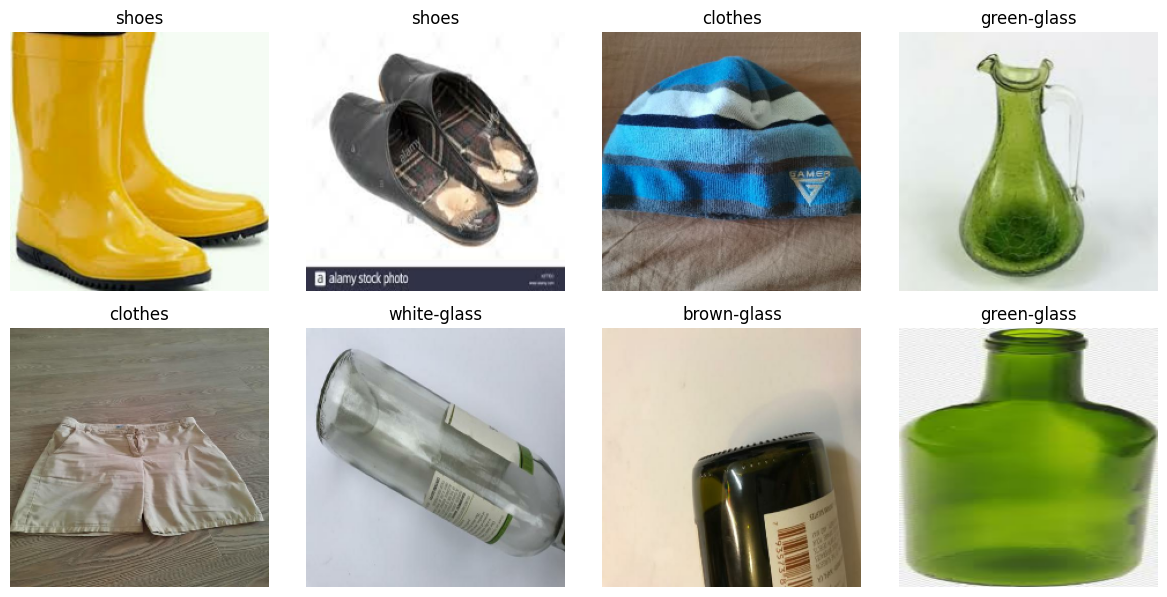

In [13]:
# Displaying some of the images from train data set
plt.figure(figsize=(12, 12))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]], fontsize=12)
        plt.axis("off")
plt.tight_layout()
plt.show()


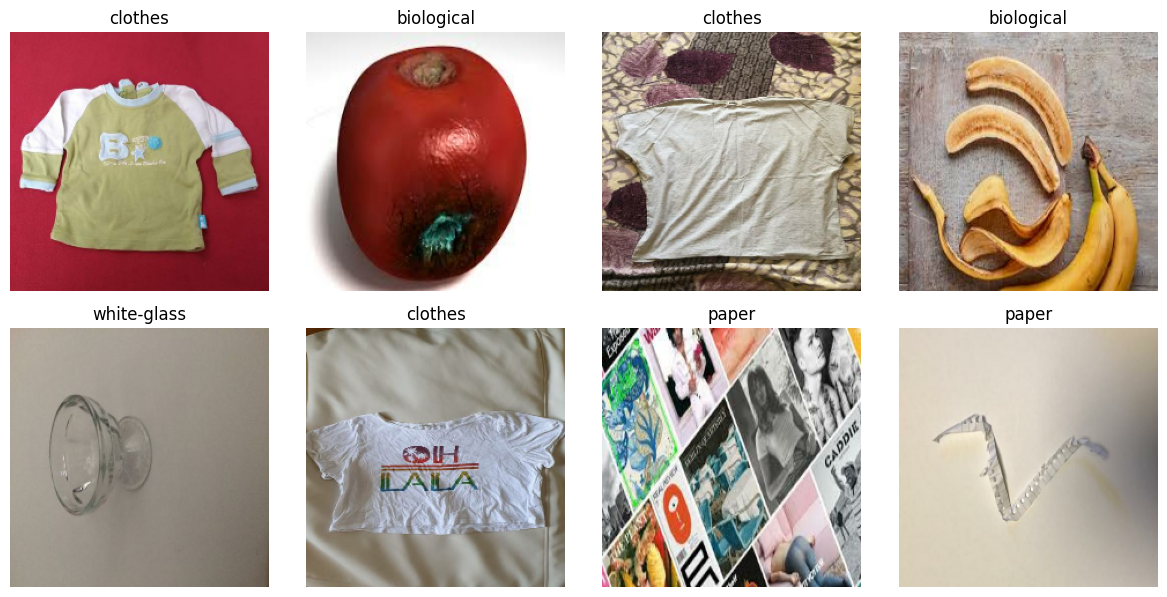

In [14]:
# Displaying some of the images from validation data set
plt.figure(figsize=(12, 12))
for images, labels in validation.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]], fontsize=12)
        plt.axis("off")
plt.tight_layout()
plt.show()


<a id="5"></a>
# **<center><span style="color:#F2F7F2;">Loading EfficientNet with Pre-trained Weights</span></center>**

In [15]:
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12,activation=tf.nn.softmax))     #12 classes
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 12)                752652    
                                                                 
Total params: 7683776 (29.31 MB)
Trainable params: 752652 (2.87 MB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


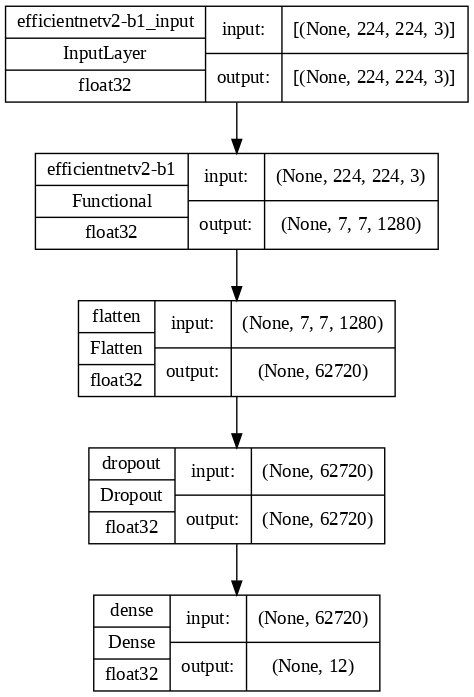

In [16]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)

<a id="5"></a>
# **<center><span style="color:#F2F7F2;">Model Training</span></center>**

In [17]:
checkpoint = ModelCheckpoint("model_trained_effnet.h5", save_best_only=True)

In [18]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)    # patience de 5 para 10

In [19]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
hist=keras_model.fit_generator(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/10
97/97 [==============================] - 56s 414ms/step - loss: 0.5730 - accuracy: 0.8972 - val_loss: 0.1137 - val_accuracy: 0.9762
Epoch 2/10
97/97 [==============================] - 33s 327ms/step - loss: 0.1478 - accuracy: 0.9715 - val_loss: 0.0910 - val_accuracy: 0.9852
Epoch 3/10
97/97 [==============================] - 33s 329ms/step - loss: 0.0947 - accuracy: 0.9805 - val_loss: 0.1056 - val_accuracy: 0.9865
Epoch 4/10
97/97 [==============================] - 33s 325ms/step - loss: 0.0691 - accuracy: 0.9861 - val_loss: 0.0899 - val_accuracy: 0.9881
Epoch 5/10
97/97 [==============================] - 33s 328ms/step - loss: 0.0701 - accuracy: 0.9856 - val_loss: 0.1050 - val_accuracy: 0.9894
Epoch 6/10
97/97 [==============================] - 34s 340ms/step - loss: 0.0785 - accuracy: 0.9863 - val_loss: 0.0886 - val_accuracy: 0.9907
Epoch 7/10
97/97 [==============================] - 33s 326ms/step - loss: 0.0852 - accuracy: 0.9857 - val_loss: 0.1020 - val_accuracy: 0.9884

<a id="5"></a>
# **<center><span style="color:#F2F7F2;">Model Evaluation</span></center>**

In [21]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

25/25 [==============================] - 8s 261ms/step - loss: 0.1011 - accuracy: 0.9916
Test Loss = 0.10112244635820389
Test Accuracy = 0.9916210174560547


In [22]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0  0.572964  0.897196  0.113727      0.976152
1  0.147771  0.971479  0.090978      0.985176
2  0.094711  0.980503  0.105579      0.986465
3  0.069123  0.986062  0.089876      0.988076
4  0.070120  0.985578  0.104985      0.989365
5  0.078523  0.986304  0.088638      0.990654
6  0.085233  0.985740  0.102011      0.988398
7  0.076324  0.988640  0.099282      0.989365
8  0.053489  0.991299  0.130364      0.989043
9  0.054504  0.991863  0.101122      0.991621

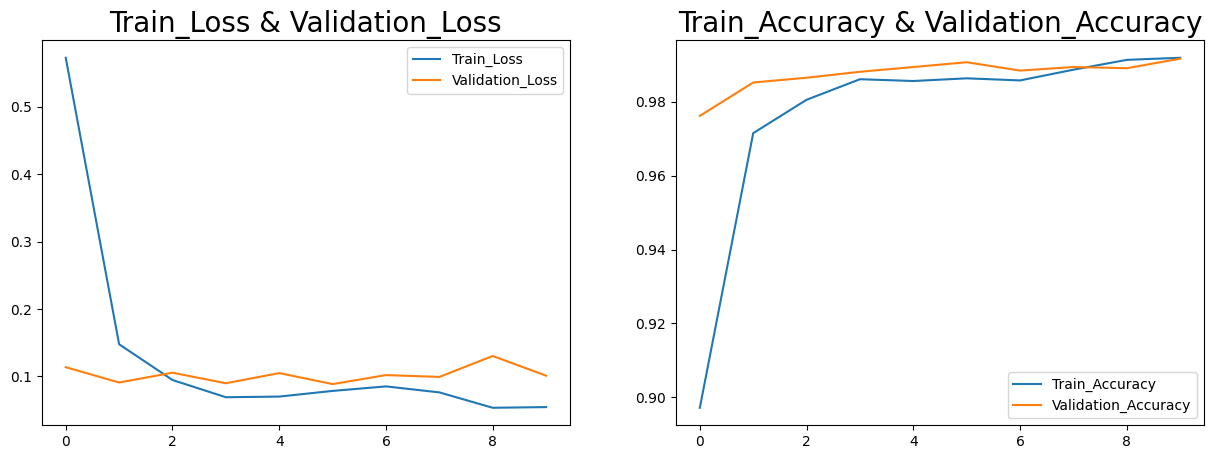

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [24]:

# Initialize empty lists
X_val, y_val, y_pred = [], [], []

# Iterate through the validation dataset
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.append(images.numpy())

# Concatenate the list of arrays into a single array
X_val = np.concatenate(X_val)

# Predict using the model
predictions = keras_model.predict(X_val)

# Iterate through predictions and get the index of the maximum value
for i in predictions:
    y_pred.append(np.argmax(i))

# Create a DataFrame to store actual and predicted values
df = pd.DataFrame({'Actual': y_val, 'Prediction': y_pred})


97/97 [==============================] - 10s 58ms/step


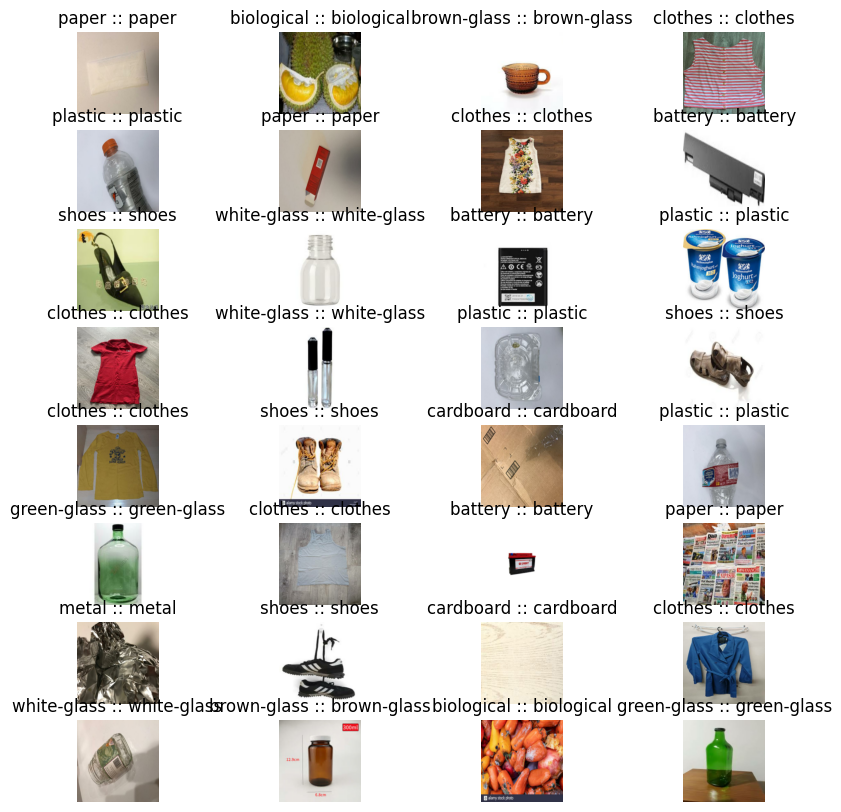

In [25]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

<a id="6"></a>
# **<center><span style="color:#F2F7F2;">Confusion Matrix</span></center>**

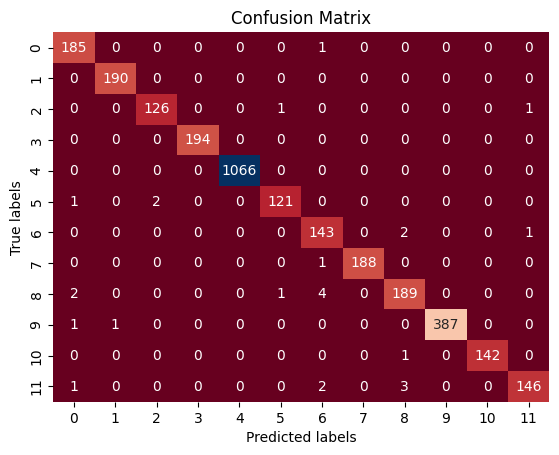

array([[ 185,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0],
       [   0,  190,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  126,    0,    0,    1,    0,    0,    0,    0,    0,
           1],
       [   0,    0,    0,  194,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0, 1066,    0,    0,    0,    0,    0,    0,
           0],
       [   1,    0,    2,    0,    0,  121,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,  143,    0,    2,    0,    0,
           1],
       [   0,    0,    0,    0,    0,    0,    1,  188,    0,    0,    0,
           0],
       [   2,    0,    0,    0,    0,    1,    4,    0,  189,    0,    0,
           0],
       [   1,    1,    0,    0,    0,    0,    0,    0,    0,  387,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0,  142,
           0],
       [   1,    0,  

In [26]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

<a id="7"></a>
# **<center><span style="color:#F2F7F2;">Accuracy</span></center>**

In [27]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 99.1621%
